In [1]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_formats = ['svg']

In [4]:
data = pd.read_csv('data/robot_field_data_sep.csv', sep=';')

In [5]:
data.head()

,Unnamed: 0,%time,field.data,field_vel
0,0,1681336013648011312,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-0.0, -0.0, 0.0, 0.0, 0.0, -0.0]"
1,1,1681336013662007417,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-0.0, -0.0, 0.0, 0.0, 0.0, -0.0]"
2,2,1681336013704952912,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-0.0, -0.0, 0.0, 0.0, 0.0, -0.0]"
3,3,1681336013739099754,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-0.0, -0.0, 0.0, 0.0, 0.0, -0.0]"
4,4,1681336013753128933,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-0.0, -0.0, 0.0, 0.0, 0.0, -0.0]"


Get timeframes where a new data collection episode starts

In [6]:
indices = np.where(np.diff(data["%time"].to_list()) > 1e9)[0]+1
print(indices)

[ 3349  5520  7344  9073 10546 12116 13831 15136 16543 17891 19243 21183
 22271]


In [42]:
grids, commands = torch.load('data/robot_field_data.pt')
print(len(grids))

23717


## Visualization

In [38]:
freq_in = 40.0
freq_out = 10.0

In [39]:
import cv2
import numpy as np
from matplotlib.colors import ListedColormap

def save_grids_as_video(grids, indices, video_filename, upscale_factor=8):
    if not indices:
        print("No indices provided. Nothing to save.")
        return

    # Get the dimensions of the grids and upscale them
    height, width = grids[0].shape
    upscaled_width = int(width * upscale_factor)
    upscaled_height = int(height * upscale_factor)

    # Create a video writer
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    video_writer = cv2.VideoWriter(video_filename, fourcc, freq_out, (upscaled_width, upscaled_height), isColor=True)

    # Define the color map
    cmap = ListedColormap(['grey', 'white', 'black'])

    for index in indices:
        # Get the grid to save and apply the color map
        grid_to_save = grids[index]
        grid_color_mapped = cmap(grid_to_save + 1) / 2  # Normalize values to [0, 1])

        # Convert the grid to the correct format for the video writer
        grid_BGR = (grid_color_mapped[:, :, :3] * 255).astype(np.uint8)
        grid_BGR = cv2.cvtColor(grid_BGR, cv2.COLOR_RGB2BGR)

        # Resize the frame
        grid_resized = cv2.resize(grid_BGR, (upscaled_width, upscaled_height), interpolation=cv2.INTER_AREA)

        # Write the frame to the video
        video_writer.write(grid_resized)

    # Close the video writer
    video_writer.release()
    print("Video saved as", video_filename)

Video saved as videos/episode_1.avi


/tmp/ipykernel_1322/4183597262.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


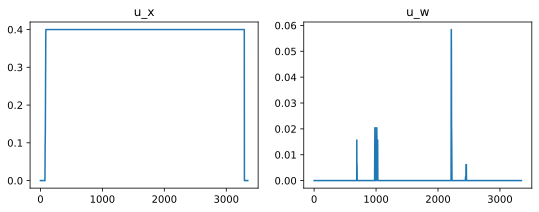

Video saved as videos/episode_2.avi


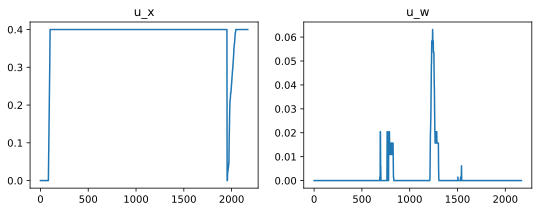

Video saved as videos/episode_3.avi


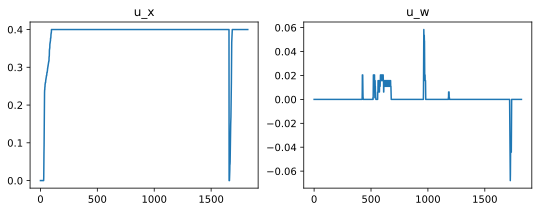

Video saved as videos/episode_4.avi


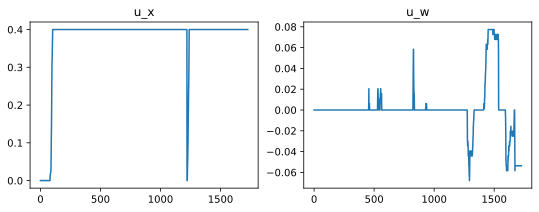

Video saved as videos/episode_5.avi


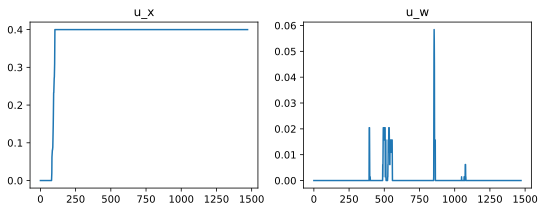

Video saved as videos/episode_6.avi


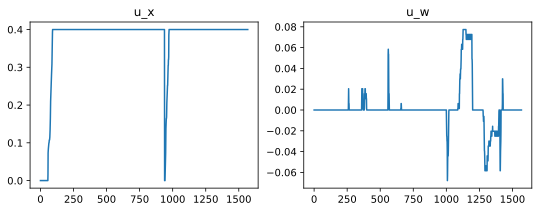

Video saved as videos/episode_7.avi


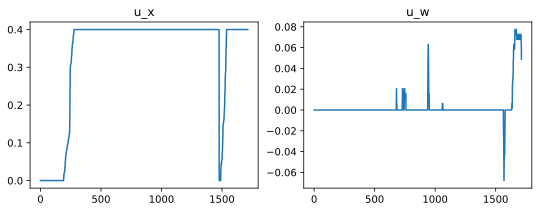

Video saved as videos/episode_8.avi


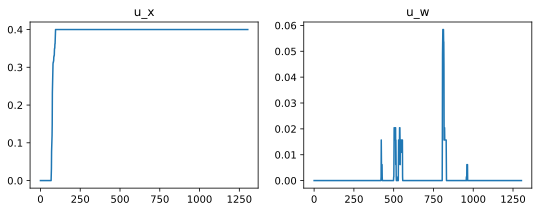

Video saved as videos/episode_9.avi


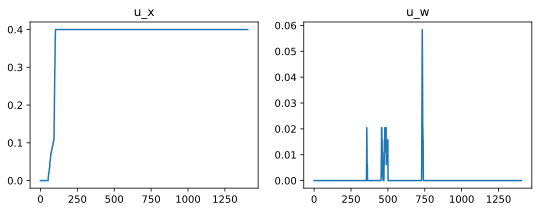

Video saved as videos/episode_10.avi


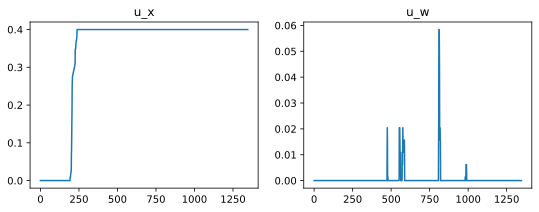

Video saved as videos/episode_11.avi


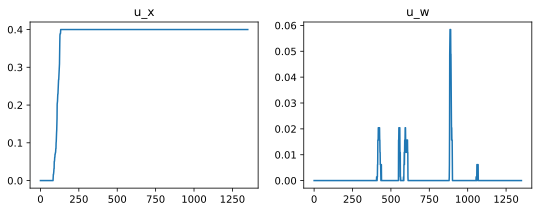

Video saved as videos/episode_12.avi


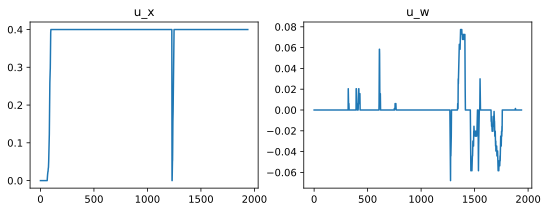

Video saved as videos/episode_13.avi


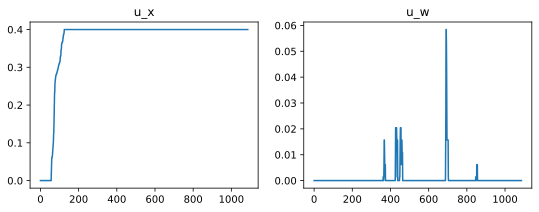

Video saved as videos/episode_14.avi


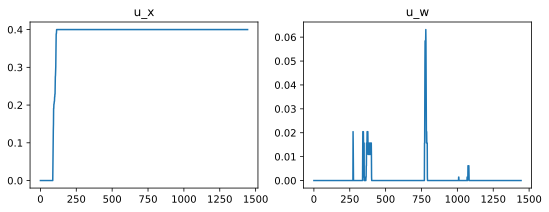

In [54]:
episodes_indices = [0, 3349,  5520,  7344,  9073, 10546, 12116, 13831, 15136, 16543, 17891, 19243, 21183, 22271, 23717]

for i in range(len(episodes_indices)-1):
  grids_to_save = range(episodes_indices[i], episodes_indices[i+1]-1, int(freq_in/freq_out))
  video_filename = f"videos/episode_{i+1}.avi"
  save_grids_as_video(grids, grids_to_save, video_filename)

  plt.figure(figsize=(9,3))
  plt.title(f'Episode {i+1}')
  plt.subplot(1, 2, 1)
  plt.title('u_x')
  plt.plot(commands[episodes_indices[i]:episodes_indices[i+1]-1][:,0])
  
  plt.subplot(1, 2, 2)
  plt.title('u_w')
  plt.plot(commands[episodes_indices[i]:episodes_indices[i+1]-1][:,5])
  
  plt.show()